<a href="https://colab.research.google.com/github/teena121/LGMVIP/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: TEENA SANJAY BHAVSAR**

**INTERNSHIP: LETSGROWMORE VIP**

**TASK3: STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM(BEGINNER LEVEL)**

In [49]:
#import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [50]:
#importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [51]:
#reading the first 5 rows of the dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [52]:
#reading the last 5 rows of the dataset
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
#reindexing the data values of 'High' column
df1 = data.reset_index()['High']

In [11]:
df1

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

**Getting all the essential information of the imported dataset**

In [12]:
data.index

RangeIndex(start=0, stop=2035, step=1)

In [13]:
data.shape

(2035, 8)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [15]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


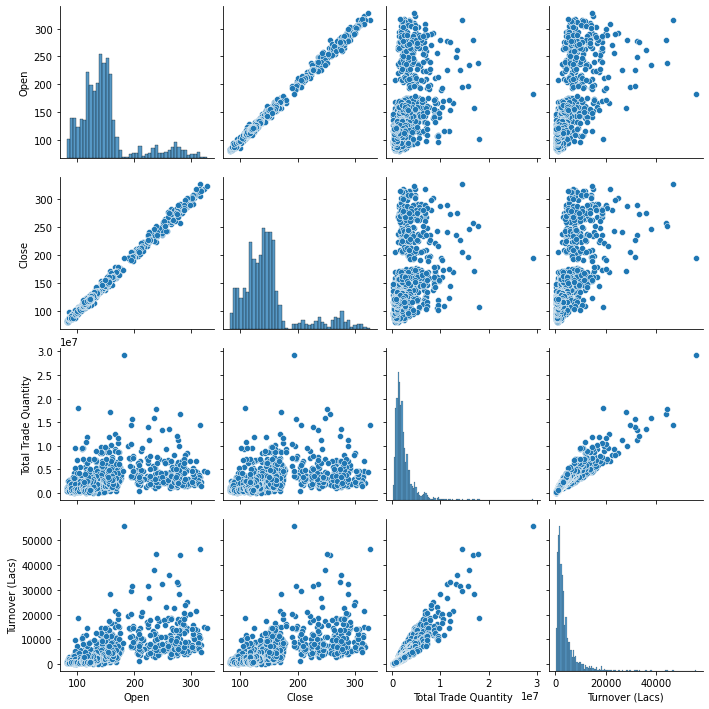

In [53]:
#representing the quantities in graphical format
import seaborn as sns
features = data[['Open',  'Close','Total Trade Quantity',
       'Turnover (Lacs)']]
sns.pairplot(features, palette='Turnover (Lacs)')

In [17]:
#sort the data according to date and time format
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


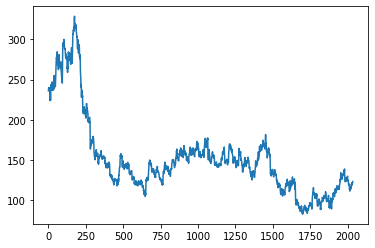

In [18]:
#let us plot the graph of stock at the high 
plt.plot(df['High'])

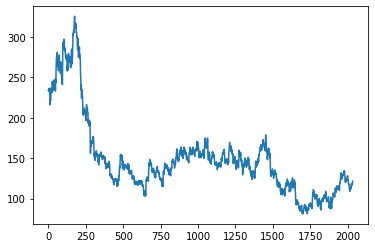

In [19]:
#let us plot the graph of stock at the close
plt.plot(df['Close'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

**Splitting the data into training and testing test**

In [26]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=(df1)[0:training_size,:],(df1)[training_size:len(df1),:1]



In [27]:
training_size,test_size

(1322, 713)

In [28]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [29]:
time_step=100
X_train,y_train=create_dataset(train_data, time_step)
X_test,y_test = create_dataset(test_data, time_step)

In [30]:
print(X_train)

[[0.62268754 0.62614353 0.6391543  ... 0.85464525 0.86013417 0.86765603]
 [0.62614353 0.6391543  0.62594023 ... 0.86013417 0.86765603 0.86480992]
 [0.6391543  0.62594023 0.63590161 ... 0.86765603 0.86480992 0.84854645]
 ...
 [0.33990649 0.32445619 0.32526936 ... 0.28217117 0.26672088 0.2722098 ]
 [0.32445619 0.32526936 0.33563732 ... 0.26672088 0.2722098  0.26956699]
 [0.32526936 0.33563732 0.33421427 ... 0.2722098  0.26956699 0.25594633]]


In [31]:
print(y_train)

[0.86480992 0.84854645 0.85362879 ... 0.26956699 0.25594633 0.26794064]


In [32]:
print(X_train.shape,y_train.shape)

(1221, 100) (1221,)


In [33]:
print(X_test.shape,y_test.shape)

(612, 100) (612,)


**Importing the tensor flow for neurala network**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
import tensorflow as tf


In [42]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
import math
from sklearn.metrics import mean_squared_error

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.1659698029950477

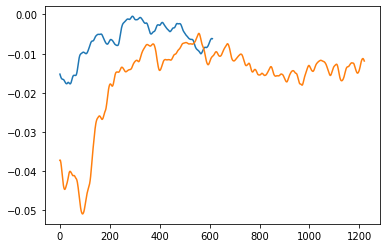

In [47]:
#getting the predicted pattern
plt.plot(test_predict)
plt.plot(train_predict)
plt.show()

**Thankyou!!**